### Exploratory Data Analysis

In this file, we will dig into the wildfire incident data further using:

- bar charts to observe trends over time
- scatterplots and heatmaps to look for relationships in the data
- calculating means to be used for predictions

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [2]:
fires_df_clean = pd.read_csv('./01_data_collection/claire_data/fires_compiled.csv')
acres_df_clean = pd.read_csv('./01_data_collection/claire_data/acres_clean.csv')

In [13]:
fires_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Incident Number       513 non-null    object 
 1   Incident Name         513 non-null    object 
 2   Incident Type         513 non-null    object 
 3   Latitude              513 non-null    int64  
 4   Longitude             513 non-null    int64  
 5   Size                  513 non-null    float64
 6   Unit of Measure       513 non-null    object 
 7   Costs                 513 non-null    float64
 8   Structures Destroyed  513 non-null    int64  
 9   Fire Name             513 non-null    object 
 10  start_date            513 non-null    object 
 11  year                  513 non-null    int64  
 12  county                513 non-null    object 
 13  cost_per_acre         513 non-null    float64
 14  structures_per_acre   513 non-null    float64
dtypes: float64(4), int64(4)

In [14]:
acres_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    71 non-null     int64  
 1   acres_burned  71 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.2 KB


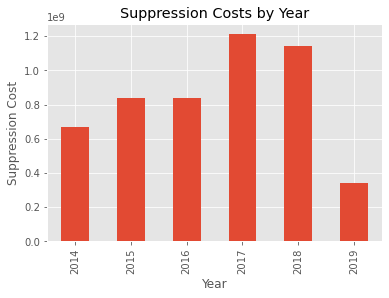

In [3]:
fires_df_clean.groupby('year')['Costs'].sum().plot(kind='bar')
plt.title('Suppression Costs by Year')
plt.ylabel('Suppression Cost')
plt.xlabel('Year');

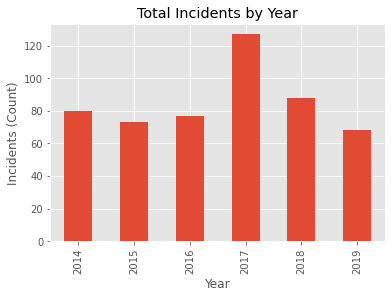

In [4]:
fires_df_clean.groupby('year')['Incident Number'].count().plot(kind='bar')
plt.title('Total Incidents by Year')
plt.ylabel('Incidents (Count)')
plt.xlabel('Year');

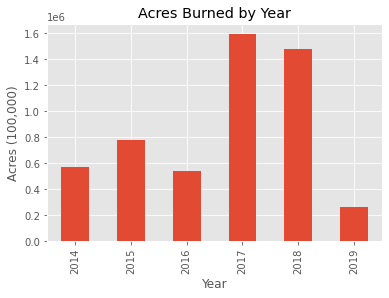

In [5]:
fires_df_clean.groupby('year')['Size'].sum().plot(kind='bar')
plt.title('Acres Burned by Year')
plt.ylabel('Acres (100,000)')
plt.xlabel('Year');

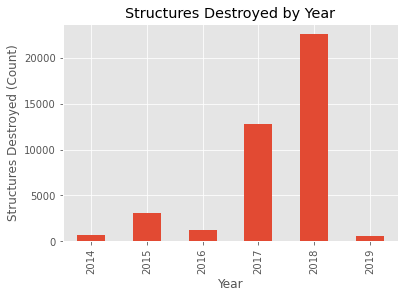

In [6]:
fires_df_clean.groupby('year')['Structures Destroyed'].sum().plot(kind='bar')
plt.title('Structures Destroyed by Year')
plt.ylabel('Structures Destroyed (Count)')
plt.xlabel('Year');

**Bar plots:** The 4 plots above look at 4 metrics by year: Total suppression costs, number of incidents, total acres burned, and total structures destroyed. We can see that each bar plot follows a similar pattern, with the highest values in 2017 and 2018.

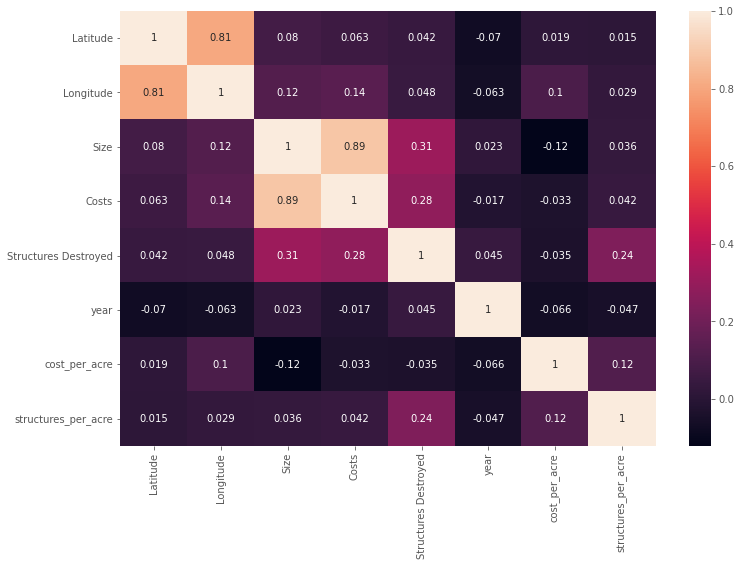

In [7]:
plt.subplots(figsize=(12,8))
sns.heatmap(fires_df_clean.corr(), annot=True);

**Heatmap:** In the heatmap, we can see correlations between our variables. The most notable is the correlation between Cost and Size, which shows a correlation of 0.89. Structures Destroyed is also correlated with both Size and Costs. There is a correlation between Latitude and Longitude, but this is less relevant for the purpose of this study since we are looking at California alone.

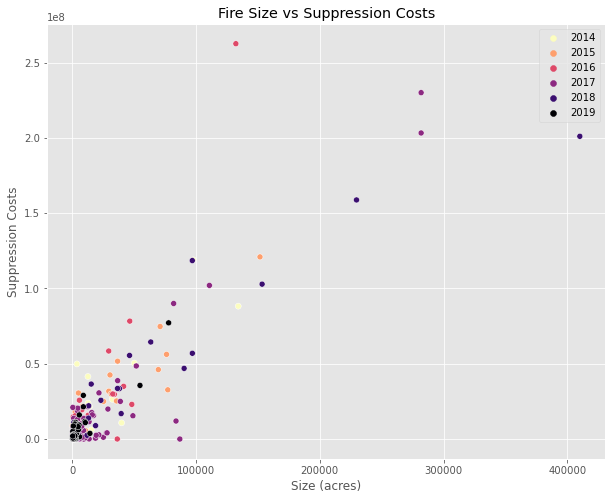

In [8]:
plt.style.use('ggplot')
plt.subplots(figsize=(10,8))
sns.scatterplot(x = 'Size', 
                y = 'Costs', 
                data = fires_df_clean, 
                hue='year',
                palette='magma_r')
plt.legend(loc='best');
plt.title('Fire Size vs Suppression Costs')
plt.xlabel('Size (acres)')
plt.ylabel('Suppression Costs');

In [9]:
fires_df_clean.groupby('year')['cost_per_acre'].mean()

year
2014    3211.952170
2015    4440.627015
2016    2915.198240
2017    2670.354458
2018    2832.880773
2019    2681.698553
Name: cost_per_acre, dtype: float64

In [10]:
# Calculating a mean value to be used for predictions in the model notebook
fires_df_clean['cost_per_acre'].mean()

3072.8581597685525

In [11]:
fires_df_clean['structures_per_acre'].describe()

count    513.000000
mean       0.004719
std        0.026054
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000515
max        0.463178
Name: structures_per_acre, dtype: float64

In [12]:
# Calculating a mean value to be used for predictions in the model notebook
fires_df_clean['structures_per_acre'].mean()

0.004719401059238755